# Interpretabilidad desde la Optimización

### José Pablo Kiesling Lange

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## Parte 1: Fundamentos guiados

Minimizar la función:

\begin{equation}
f(x,y) = x^2 + y^2
\end{equation}

sujeto a la restricción:
\begin{equation}
x + y = 1
\end{equation}

### 1. Escribir el lagrangiano

\begin{equation}
\mathcal{L}(x,y,\lambda) = x^2 + y^2 + \lambda (1 - x - y)
\end{equation}

In [2]:
x, y, λ = sp.symbols('x y lambda')
L = x**2 + y**2
constraint = x + y - 1

In [3]:
Lag = L + λ * constraint

### 2. Derivar respecto a x, y, y λ

In [4]:
eqs = [sp.diff(Lag, v) for v in (x, y, λ)]

### 3. Encontrar el punto que satisface ∇L = 0

In [5]:
solution = sp.solve(eqs, (x, y, λ))

In [6]:
solution

{lambda: -1, x: 1/2, y: 1/2}

## Preguntas
**1. ¿Qué representa λ?**
El multiplicador de Lagrange es una tasa de cambio de la función objetivo con respecto a la restricción. Es decir, cuánto cambiaría el valor óptimo de la función objetivo si se modificara ligeramente la restricción.

**2. ¿Qué ocurriría si la restricción se eliminara?**
El problema que veo es que si es una regla de negocio, eliminar la restricción podría llevar a soluciones que no sean viables en el contexto del negocio. Ahora en términos matemáticos, si se eliminara la restricción, el problema de optimización se reduciría a minimizar simplemente \( f(x,y) = x^2 + y^2 \). En este caso, el mínimo global sería en el punto (0,0), ya que es el punto donde la función alcanza su valor más bajo.

## Parte 2: Aplicación al contexto de modelos

Suponga que un modelo tiene una función de pérdida:
\begin{equation}
L(w_1, w_2) = (w_1 - 3)^2 + (w_2 - 1)^2
\end{equation}

y se desea minimizarla bajo la restricción:
\begin{equation}
w_1 + w_2 = 2
\end{equation}

In [7]:
w1, w2, λ = sp.symbols('w1 w2 λ')
L = (w1 - 3)**2 + (w2 - 1)**2
constraint = w1 + w2 - 2

Lag = L + λ * constraint
eqs = [sp.diff(Lag, v) for v in (w1, w2, λ)]
solution = sp.solve(eqs, (w1, w2, λ))
solution

{w1: 2, w2: 0, λ: 2}

### Sin restricción

In [8]:
w1, w2, λ = sp.symbols('w1 w2 λ')
L = (w1 - 3)**2 + (w2 - 1)**2
constraint = 0

Lag = L + λ * constraint
eqs = [sp.diff(Lag, v) for v in (w1, w2, λ)]
solution = sp.solve(eqs, (w1, w2, λ))
solution

{w1: 3, w2: 1}

## Preguntas

**1. Compare el resultado con el mínimo sin restricción**
El mínimo sin restricción se encuentra en el punto (3,1), a diferencia de cuando sí la tiene donde el mínimo es (2,0). Esto muestra cómo las restricciones pueden influir en la solución óptima de un problema de optimización.

**2. ¿Qué efecto tiene imponer una relación entre los parámetros del modelo?**
Puede limitar el espacio de soluciones posibles, lo que puede llevar a las  soluciones subóptimas. Sin embargo, también puede ser beneficioso en términos de interpretabilidad y cumplimiento de reglas de negocio.

**3. ¿Cómo se podría interpretar el multiplicador de Lagrange en este contexto?**
Indica cuánto cambiaría el valor mínimo de la función de pérdida si se modificara ligeramente la restricción \( w_1 + w_2 = 2 \). Esto significa que si se permitiera que la suma de los pesos fuera un poco mayor o menor, el valor mínimo de la pérdida cambiaría en relación al valor del multiplicador de Lagrange.

## Parte 3: Visualización y análisis

In [9]:
def loss(w1, w2):
    return (w1 - 3)**2 + (w2 - 1)**2

In [10]:
W1, W2 = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100))
Z = loss(W1, W2)

In [11]:
line = np.linspace(0, 4, 100)
constraint_line = 2 - line  # w1 + w2 = 2

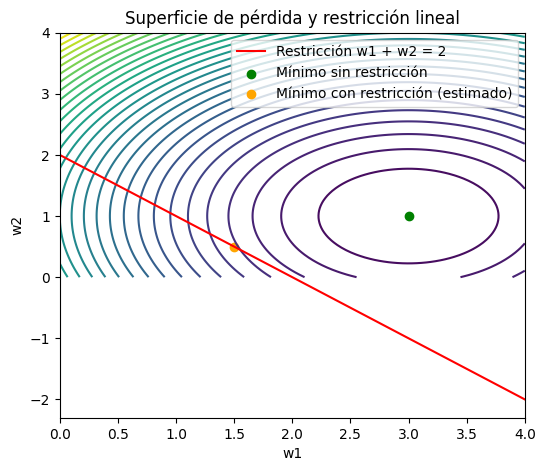

In [12]:
plt.figure(figsize=(6, 5))
plt.contour(W1, W2, Z, levels=30)
plt.plot(line, constraint_line, 'r-', label='Restricción w1 + w2 = 2')
plt.scatter(3, 1, color='green', label='Mínimo sin restricción')
plt.scatter(1.5, 0.5, color='orange', label='Mínimo con restricción (estimado)')
plt.xlabel('w1')
plt.ylabel('w2')
plt.legend()
plt.title('Superficie de pérdida y restricción lineal')
plt.show()

### Preguntas
**1. ¿Cómo cambia el punto mínimo cuando se impone la restricción?**
El punto mínimo cambia de (3,1) sin restricción a (1.5, 0.5) con la restricción. Esto demuestra cómo las restricciones pueden influir en la solución óptima de un problema de optimización.

**2. ¿Qué relación observa entre el grado de libertad del modelo y la imposición de condiciones interpretables?**
Al imponer condiciones interpretables, se reduce el grado de libertad del modelo, lo que puede llevar a soluciones subóptimas pero más interpretables y alineadas con las reglas de negocio.